In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Trump.csv')
df

,user_country,source,content,date
0,NaN,Twitter Web App,In the 2016 Election Trump Ordered his Staff t...,2020-09-29T23:59:59+00:00
1,NaN,Twitter for iPhone,@DonaldJTrumpJr @realDonaldTrump FakeNews will...,2020-09-29T23:59:59+00:00
2,"New York City, USA",Twitter Web App,@WildPalmsLtd But it goes way beyond the lopsi...,2020-09-29T23:59:59+00:00
3,NaN,Twitter Web App,High Plains Pundit: Trump administration to al...,2020-09-29T23:59:59+00:00
4,NaN,Twitter Web App,@AnnCoulter @realDonaldTrump I can’t like this...,2020-09-29T23:59:59+00:00
...,...,...,...,...
1995,NaN,Twitter Web App,@JoeBiden @KamalaHarris #PresidentialDebate202...,2020-09-29T23:58:27+00:00
1996,NaN,Twitter for iPhone,@MaxBoot Too bad George Bush put the evil clea...,2020-09-29T23:58:27+00:00
1997,"Central City, KY",Twitter for iPhone,Trump real job is Twitter and @FoxNews. https:...,2020-09-29T23:58:27+00:00
1998,USA,Conservative Daily News,Watch: President Trump Gives an Update on the ...,2020-09-29T23:58:27+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

52871
['in', 'the', '2016', 'election', 'trump', 'ordered', 'his', 'staff', 'to', 'block', '3.5', 'million', 'black', 'americans', 'from', 'voting', '!', 'black', 'americans', ';']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 149.95%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

21482
['election', 'trump', 'ordered', 'staff', 'block', 'million', 'black', 'americans', 'voting', 'black', 'americans', 'attack', 'racist', 'fraud', 'trump', 'voting', 'site', 'mail', 'votes', 'vote']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@realdonaldtrump', 615),
 ('@joebiden', 184),
 ('@donaldjtrumpjr', 49),
 ('@kamalaharris', 27),
 ('@whitehouse', 25),
 ('@mike_pence', 24),
 ('@cnn', 24),
 ('@erictrump', 21),
 ('@steveguest', 20),
 ('@youtube', 18),
 ('@gamebredfighter', 17),
 ('@anncoulter', 16),
 ('@potus', 15),
 ('@marshablackburn', 14),
 ('@abc', 13),
 ('@jim_jordan', 12),
 ('@gtconway3d', 12),
 ('@crnc', 11),
 ('@real_defender', 11),
 ('@projectlincoln', 10)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,NaN,Twitter Web App,In the 2016 Election Trump Ordered his Staff t...,2020-09-29T23:59:59+00:00,Negative
1,NaN,Twitter for iPhone,@DonaldJTrumpJr @realDonaldTrump FakeNews will...,2020-09-29T23:59:59+00:00,Neutral
2,"New York City, USA",Twitter Web App,@WildPalmsLtd But it goes way beyond the lopsi...,2020-09-29T23:59:59+00:00,Negative
3,NaN,Twitter Web App,High Plains Pundit: Trump administration to al...,2020-09-29T23:59:59+00:00,Negative
4,NaN,Twitter Web App,@AnnCoulter @realDonaldTrump I can’t like this...,2020-09-29T23:59:59+00:00,Neutral
...,...,...,...,...,...
1995,NaN,Twitter Web App,@JoeBiden @KamalaHarris #PresidentialDebate202...,2020-09-29T23:58:27+00:00,Positive
1996,NaN,Twitter for iPhone,@MaxBoot Too bad George Bush put the evil clea...,2020-09-29T23:58:27+00:00,Negative
1997,"Central City, KY",Twitter for iPhone,Trump real job is Twitter and @FoxNews. https:...,2020-09-29T23:58:27+00:00,Positive
1998,USA,Conservative Daily News,Watch: President Trump Gives an Update on the ...,2020-09-29T23:58:27+00:00,Neutral


In [11]:
df.sentiment.value_counts()

Positive    765
Neutral     730
Negative    505
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 38.25%
Percentage of neutral tweets: 36.50%
Percentage of negative tweets: 25.25%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

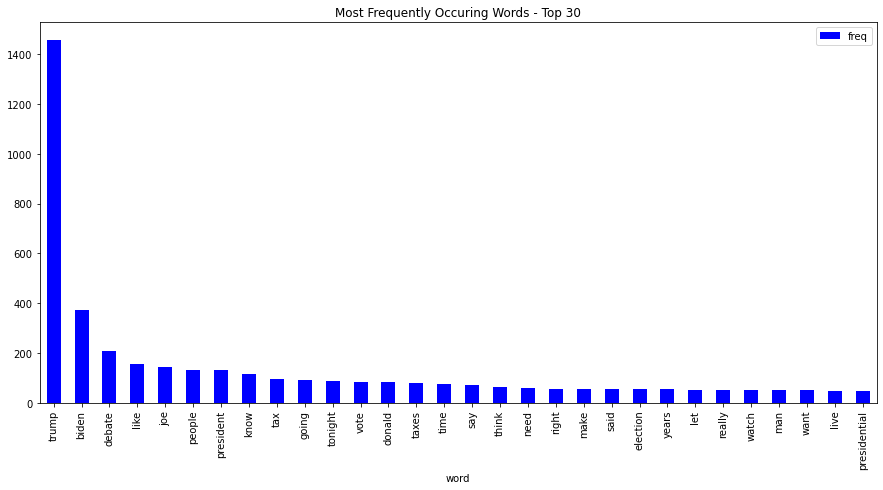

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Trump-Debate1')

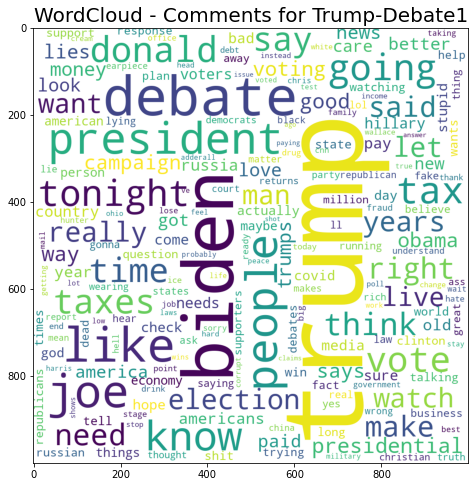

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Trump-Debate1", fontsize = 20)

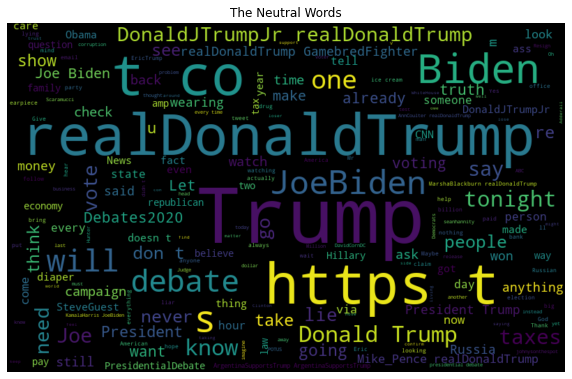

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

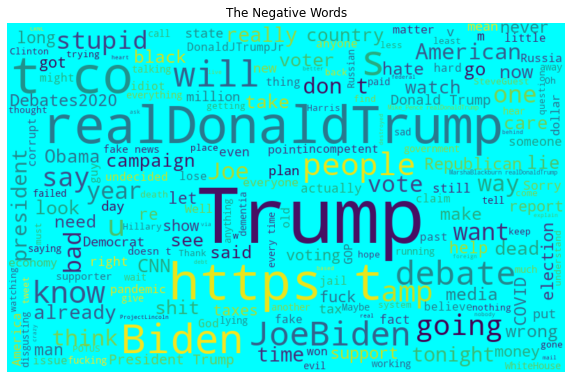

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

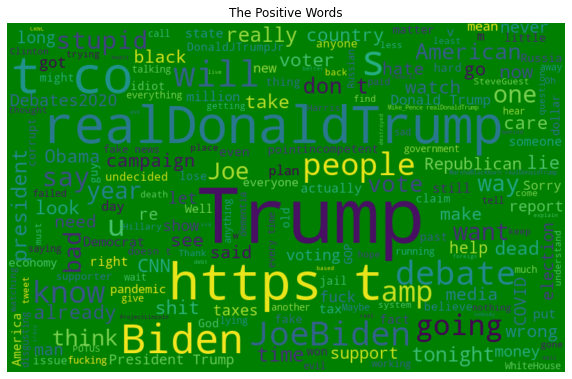

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,In the 2016 Election Trump Ordered his Staff t...,Negative
1,@DonaldJTrumpJr @realDonaldTrump FakeNews will...,Neutral
2,@WildPalmsLtd But it goes way beyond the lopsi...,Negative
3,High Plains Pundit: Trump administration to al...,Negative
4,@AnnCoulter @realDonaldTrump I can’t like this...,Neutral
...,...,...
1995,@JoeBiden @KamalaHarris #PresidentialDebate202...,Positive
1996,@MaxBoot Too bad George Bush put the evil clea...,Negative
1997,Trump real job is Twitter and @FoxNews. https:...,Positive
1998,Watch: President Trump Gives an Update on the ...,Neutral


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Negative,in the election trump ordered his staff to blo...
1,Neutral,fakenews will be outed by facts let them suffer
2,Negative,but it goes way beyond the lopsided unfair tax...
3,Negative,high plains pundit trump administration to all...
4,Neutral,i can t like this tweet but i do
...,...,...
1995,Positive,presidentialdebate debates presidentialdebate ...
1996,Negative,too bad george bush put the evil clearance tho...
1997,Positive,trump real job is twitter and
1998,Neutral,watch president trump gives an update on the n...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
5,Positive,great job we see you
9,Positive,if biden asks trump to elaborate on details of...
11,Positive,some people are feet under because of trump wi...
14,Positive,if only your words were worth a shit
17,Positive,pence even better than biden beating trump wil...
...,...,...
1986,Negative,i think biden will be fine i also feel he shou...
1989,Negative,well you might get a private cell there will b...
1992,Negative,the dead vote in ohio dewine is doing everythi...
1993,Negative,peep the trump poster fucking clown


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
5,1,great job we see you
9,1,if biden asks trump to elaborate on details of...
11,1,some people are feet under because of trump wi...
14,1,if only your words were worth a shit
17,1,pence even better than biden beating trump wil...
...,...,...
1986,0,i think biden will be fine i also feel he shou...
1989,0,well you might get a private cell there will b...
1992,0,the dead vote in ohio dewine is doing everythi...
1993,0,peep the trump poster fucking clown


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(952, 2)
(318, 2)


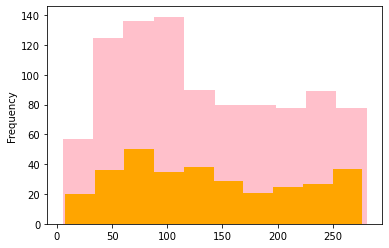

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(310068, 482660)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('biden', 0.763880729675293),
 ('sec', 0.7568496465682983),
 ('democratic', 0.756518542766571),
 ('refused', 0.7557262182235718),
 ('hands', 0.7549213767051697),
 ('asked', 0.7532845735549927),
 ('miss', 0.7528512477874756),
 ('alas', 0.7527664303779602),
 ('suspicious', 0.7527326345443726),
 ('action', 0.7521907091140747)]

In [37]:
model_w2v.wv.most_similar(negative = "trump")

[('our', -0.4194239377975464),
 ('by', -0.44035354256629944),
 ('republicans', -0.44633734226226807),
 ('tax', -0.4463946223258972),
 ('covid', -0.44835811853408813),
 ('thousands', -0.44914326071739197),
 ('under', -0.45461803674697876),
 ('christian', -0.4557902216911316),
 ('response', -0.4558122456073761),
 ('mitch', -0.45883262157440186)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(952, 500)
(952,)
(318, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9978991596638656
Validation Accuracy : 0.46540880503144655
F1 score : 0.4879518072289156
[[ 67  54]
 [116  81]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9947478991596639
Validation Accuracy : 0.5125786163522013
f1 score : 0.5609065155807365
[[64 57]
 [98 99]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9978991596638656
Validation Accuracy : 0.5157232704402516
f1 score : 0.5523255813953488
[[ 69  52]
 [102  95]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9432773109243697
Validation Accuracy : 0.6163522012578616
f1 score : 0.7458333333333333
[[ 17 104]
 [ 18 179]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 is the trump campaign afraid that his supporters might actually watch the debate and this is a last minute move to distract them 

First sample after preprocessing: 
 [  8   1   2 140  14  18 220 262 221  96   1  24   4  25   8   5 175   3
 103   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 2s - loss: 0.6809 - accuracy: 0.5981 - val_loss: 0.6785 - val_accuracy: 0.5833
Epoch 2/20
7/7 - 1s - loss: 0.6724 - accuracy: 0.5981 - val_loss: 0.6781 - val_accuracy: 0.5833
Epoch 3/20
7/7 - 2s - loss: 0.6726 - accuracy: 0.5981 - val_loss: 0.6754 - val_accuracy: 0.5833
Epoch 4/20
7/7 - 2s - loss: 0.6662 - accuracy: 0.5981 - val_loss: 0.6720 - val_accuracy: 0.5833
Epoch 5/20
7/7 - 1s - loss: 0.6620 - accuracy: 0.5981 - val_loss: 0.6649 - val_accuracy: 0.5833
Epoch 6/20
7/7 - 1s - loss: 0.6459 - accuracy: 0.5981 - val_loss: 0.6507 - val_accuracy: 0.5833
Epoch 7/20
7/7 - 1s - loss: 0.6176 - accuracy: 0.6040 - val_loss: 0.6253 - val_accuracy: 0.5938
Epoch 8/20
7/7 - 1s - loss: 0.5661 - accuracy: 0.6904 - val_loss: 0.5849 - val_accuracy: 0.7188
Epoch 9/20
7/7 - 1s - loss: 0.4993 - accuracy: 0.7862 - val_loss: 0.5398 - val_accuracy: 0.7604
Epoch 10/20
7/7 - 1s - loss: 0.4073 - accuracy: 0.8633 - val_loss: 0.5036 - val_accuracy: 0.7708
Epoch 11/20
7/7 - 1s - loss: 0.3273 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,0,in the election trump ordered his staff to blo...
1,-1,fakenews will be outed by facts let them suffer
2,0,but it goes way beyond the lopsided unfair tax...
3,0,high plains pundit trump administration to all...
4,-1,i can t like this tweet but i do
...,...,...
1995,1,presidentialdebate debates presidentialdebate ...
1996,0,too bad george bush put the evil clearance tho...
1997,1,trump real job is twitter and
1998,-1,watch president trump gives an update on the n...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.9966666666666667
Validation Accuracy : 0.49
F1 score : [0.57142857 0.24365482 0.52896725]
[[116  25  44]
 [ 43  24  60]
 [ 62  21 105]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.908
Validation Accuracy : 0.474
f1 score : [0.5388601  0.16666667 0.53363229]
[[104  11  70]
 [ 44  14  69]
 [ 53  16 119]]


C:\Users\anshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9966666666666667
Validation Accuracy : 0.452
f1 score : [0.56140351 0.27848101 0.44505495]
[[112  36  37]
 [ 36  33  58]
 [ 66  41  81]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8633333333333333
Validation Accuracy : 0.52
f1 score : [0.63209877 0.02962963 0.56521739]
[[128   2  55]
 [ 38   2  87]
 [ 54   4 130]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['wall to wall trump never built a wall mexico never paid for it sad', 'fda hammill please don t mention the pound elephant in the room trump trillion now munemployed stocksplunge trumplied kdied of business closed during pandemic will never reopen debates', 'if is running his debate prep trump s in great hands the guy is a master behind the lectern', 'i could justify a biden vote more than a trump vote i wouldn t call it defending', 'his place in gilead', 'people need to understand this', 'whatever you do people don t make ukraine the drink word you need to be alive to vote in a couple weeks', 'president trump and biden debate live on rsbn', 'pain i m so sorry', 'oh geez i am waiting for a list of the nda s trump has with women he has sexually harassed', 'now that s some funny shit there lol character hahahahaha', 'donald trump could be on trial sooner than you think via', 'the actor plays a defiant fbi director james comey when donald trump demand

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.4141 - accuracy: 0.2570 - val_loss: 0.3139 - val_accuracy: 0.2400
Epoch 2/20
11/11 - 2s - loss: 0.0801 - accuracy: 0.2533 - val_loss: 0.3650 - val_accuracy: 0.2400
Epoch 3/20
11/11 - 2s - loss: 0.0994 - accuracy: 0.2533 - val_loss: 0.3727 - val_accuracy: 0.2400
Epoch 4/20
11/11 - 3s - loss: 0.0805 - accuracy: 0.2533 - val_loss: 0.3690 - val_accuracy: 0.2400
Epoch 5/20
11/11 - 2s - loss: 0.0705 - accuracy: 0.2533 - val_loss: 0.2566 - val_accuracy: 0.2400
Epoch 6/20
11/11 - 3s - loss: -2.4206e-02 - accuracy: 0.2533 - val_loss: 0.1485 - val_accuracy: 0.2400
Epoch 7/20
11/11 - 2s - loss: -2.1821e-01 - accuracy: 0.2533 - val_loss: -4.1679e-02 - val_accuracy: 0.2400
Epoch 8/20
11/11 - 3s - loss: -7.3514e-01 - accuracy: 0.2533 - val_loss: -5.6052e-01 - val_accuracy: 0.2400
Epoch 9/20
11/11 - 3s - loss: -2.2343e+00 - accuracy: 0.2533 - val_loss: -1.9002e+00 - val_accuracy: 0.2400
Epoch 10/20
11/11 - 4s - loss: -6.2862e+00 - accuracy: 0.2533 - val_loss: -5.1677e+